# Feature Importance

Sums up how much splitting on a feature reduces entropy for each tree and averages out the value.

Accuracy on test set: 0.7115902964959568


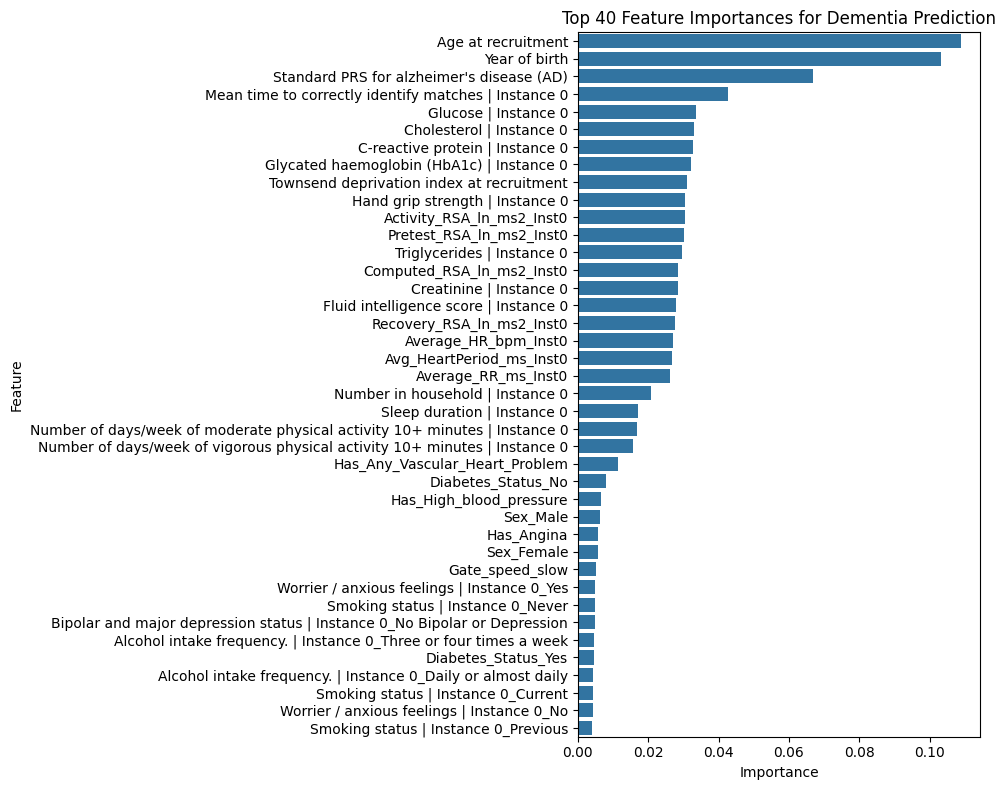

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load dataset
df = pd.read_csv("uk_biobank_dataset.csv")

# 2. Drop rows with missing target
df = df.dropna(subset=["Dementia Status"])

# 3. Separate features and target
X = df.drop(columns=["Dementia Status"])
y = df["Dementia Status"]

# 4. Drop non-numeric columns for simplicity
X = X.select_dtypes(include="number")

# 5. Fill missing values
imputer = SimpleImputer(strategy="mean")
X_imputed = imputer.fit_transform(X)

# 6. Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# 7. Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 8. Train Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 9. Accuracy
y_pred = model.predict(X_test)
print("Accuracy on test set:", accuracy_score(y_test, y_pred))

# 10. Feature importances
importances = model.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

# 11. Plot top 20 features
plt.figure(figsize=(10, 8))
sns.barplot(x="Importance", y="Feature", data=feature_importance_df.head(40))
plt.title("Top 40 Feature Importances for Dementia Prediction")
plt.tight_layout()
plt.show()

